In [10]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

In [6]:
df = pd.read_csv('Downloads/MyLA311_Service_Request_Data_2019.csv')
print(df)

            SRNumber             CreatedDate             UpdatedDate  \
0       1-1370699412  06/09/2019 09:26:52 AM  06/11/2019 01:57:35 AM   
1       1-1372022321  06/11/2019 05:42:53 AM  06/12/2019 11:52:35 PM   
2       1-1372003991  06/11/2019 12:18:19 AM  06/14/2019 08:30:43 PM   
3       1-1372004091  06/11/2019 12:20:34 AM  06/18/2019 09:11:30 PM   
4       1-1372005951  06/11/2019 12:18:28 AM  06/18/2019 11:21:05 PM   
5       1-1371998591  06/11/2019 12:01:40 AM  06/12/2019 04:25:57 PM   
6       1-1372000571  06/11/2019 12:08:36 AM  06/13/2019 06:23:49 PM   
7       1-1371999592  06/11/2019 12:06:02 AM  06/14/2019 06:22:49 PM   
8       1-1372066151  06/11/2019 07:32:47 AM  06/13/2019 03:59:30 PM   
9       1-1371999721  06/11/2019 12:17:38 AM  06/14/2019 05:38:59 PM   
10      1-1371999527  06/11/2019 12:04:15 AM  06/20/2019 01:57:14 PM   
11      1-1371997806  06/11/2019 12:07:07 AM  06/15/2019 10:49:56 AM   
12      1-1372017043  06/11/2019 04:37:44 AM  06/11/2019 11:11:4

In [7]:
print(df.columns.unique())

Index(['SRNumber', 'CreatedDate', 'UpdatedDate', 'ActionTaken', 'Owner',
       'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
       'MobileOS', 'Anonymous', 'AssignTo', 'ServiceDate', 'ClosedDate',
       'AddressVerified', 'ApproximateAddress', 'Address', 'HouseNumber',
       'Direction', 'StreetName', 'Suffix', 'ZipCode', 'Latitude', 'Longitude',
       'Location', 'TBMPage', 'TBMColumn', 'TBMRow', 'APC', 'CD', 'CDMember',
       'NC', 'NCName', 'PolicePrecinct'],
      dtype='object')


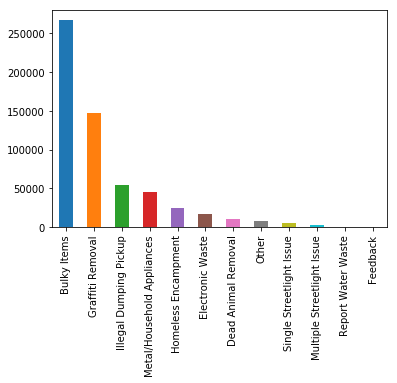

In [13]:
request_type_counts = df['RequestType'].value_counts()
request_type_counts.plot(kind='bar')

In [62]:
df2=pd.DataFrame(df[['ZipCode', 'CreatedDate']].groupby('ZipCode').count())
df3=pd.DataFrame(df2.drop(df.index[0]))
df3.rename({'CreatedDate': 'TotalRequests'}, axis=1, inplace=True)
df4=pd.DataFrame(df3.sort_values(by=['TotalRequests']))

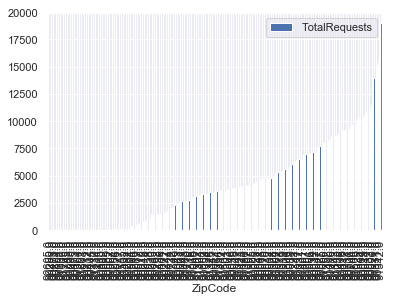

In [63]:
df4.plot(kind='bar')

In [65]:
#total of 143 different ZipCodes (print(df4))

In [74]:
year2019_column1 = pd.DataFrame(df[df.columns[1]])
year2019_column2 = pd.DataFrame(df[df.columns[7]])
year2019 = year2019_column1.join(year2019_column2)
year2019

,CreatedDate,RequestSource
0,06/09/2019 09:26:52 AM,Mobile App
1,06/11/2019 05:42:53 AM,Mobile App
2,06/11/2019 12:18:19 AM,Call
3,06/11/2019 12:20:34 AM,Mobile App
4,06/11/2019 12:18:28 AM,Mobile App
5,06/11/2019 12:01:40 AM,Call
6,06/11/2019 12:08:36 AM,Self Service
7,06/11/2019 12:06:02 AM,Mobile App
8,06/11/2019 07:32:47 AM,Self Service
9,06/11/2019 12:17:38 AM,Call
